<a href="https://colab.research.google.com/github/Satyendra0207/NLP/blob/main/32_Satyendra_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movie Recommendation System Hotstar
**BASED ON**
1.   **Movie Name**
2.   **Genre**

### Connecting google drive to attach the data file 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Libraries to Import 

In [ ]:
import pandas as pd
import numpy as np
# Import TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
# Import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Import matplotlib
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

In [ ]:
#Data Set Link
https://www.kaggle.com/datasets/goelyash/disney-hotstar-tv-and-movie-catalog?select=hotstar.csv

#### Reading The Dataset

In [ ]:
movies=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/hotstar.csv")

In [ ]:
movies.head()

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000232077,Ram Gopal Varma ki Aag,Dacoit Babban Singh is on the loose in Kaligan...,Action,2007,U/A 13+,152.0,NaN,NaN,movie
1,1000164652,Niyogam,"A mediator between the deity and the devotees,...",Drama,1997,U/A 13+,101.0,NaN,NaN,movie
2,1000105823,Injakkadan Mathai & Sons,"Injakkadan Mathai and his sons, Roy and Thanka...",Action,1993,U/A 7+,122.0,NaN,NaN,movie
3,1000163530,Viyarppinte Vila,An impoverished landlord lives in past glory a...,Drama,1962,U,149.0,NaN,NaN,movie
4,1820041764,Ek Mulaqat,"Two strangers, Avi and Nikita meet at a party ...",Romance,2019,U,7.0,NaN,NaN,movie


In [ ]:
#Creating list of unique genre
list_gen=movies['genre'].unique().tolist()
print(list_gen)

['Action', 'Drama', 'Romance', 'Historical', 'Comedy', 'Teen', 'Adventure', 'Mythology', 'Animation', 'Thriller', 'Horror', 'Superhero', 'Crime', 'Family', 'Mystery', 'Science', 'Animals & Nature', 'Documentary', 'Standup Comedy', 'Musical', 'Kids', 'Science Fiction', 'Biopic', 'Concert Film', 'Food', 'Sport', 'Fantasy', 'Shorts', 'Reality', 'Docudrama', 'Travel', 'Talk Show', 'Awards', 'Lifestyle', 'Kabaddi', 'Football']


In [ ]:
movies.shape

(6652, 10)

### Filling null values

In [ ]:
# Filling NaNs with empty string
movies['description'] = movies['description'].fillna('')

##Fillng all the NA values with 0
movies['seasons'] = movies['seasons'].fillna(0)
movies['episodes'] = movies['episodes'].fillna(0)

movies.head()

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000232077,Ram Gopal Varma ki Aag,Dacoit Babban Singh is on the loose in Kaligan...,Action,2007,U/A 13+,152.0,0.0,0.0,movie
1,1000164652,Niyogam,"A mediator between the deity and the devotees,...",Drama,1997,U/A 13+,101.0,0.0,0.0,movie
2,1000105823,Injakkadan Mathai & Sons,"Injakkadan Mathai and his sons, Roy and Thanka...",Action,1993,U/A 7+,122.0,0.0,0.0,movie
3,1000163530,Viyarppinte Vila,An impoverished landlord lives in past glory a...,Drama,1962,U,149.0,0.0,0.0,movie
4,1820041764,Ek Mulaqat,"Two strangers, Avi and Nikita meet at a party ...",Romance,2019,U,7.0,0.0,0.0,movie


### Changing Datatypes

In [ ]:
movies['seasons'] = movies['seasons'].astype('int64')
movies['episodes'] = movies['episodes'].astype('int64')
movies.dtypes

hotstar_id        int64
title            object
description      object
genre            object
year              int64
age_rating       object
running_time    float64
seasons           int64
episodes          int64
type             object
dtype: object

#### Converting to lowercase to avoid case_senstivity

In [ ]:
movies['title']=movies['title'].apply(str.lower)
movies['description']=movies['description'].apply(str.lower)
movies['genre']=movies['genre'].apply(str.lower)
movies.head()

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000232077,ram gopal varma ki aag,dacoit babban singh is on the loose in kaligan...,action,2007,U/A 13+,152.0,0,0,movie
1,1000164652,niyogam,"a mediator between the deity and the devotees,...",drama,1997,U/A 13+,101.0,0,0,movie
2,1000105823,injakkadan mathai & sons,"injakkadan mathai and his sons, roy and thanka...",action,1993,U/A 7+,122.0,0,0,movie
3,1000163530,viyarppinte vila,an impoverished landlord lives in past glory a...,drama,1962,U,149.0,0,0,movie
4,1820041764,ek mulaqat,"two strangers, avi and nikita meet at a party ...",romance,2019,U,7.0,0,0,movie


## Feature Engineering

In [ ]:
def Vectorizer_(column):
    #column="value"
    #Initalizing the vectorizer to convert string into vector  
    tfidf = TfidfVectorizer(lowercase=True,analyzer='word',
                      token_pattern=r'\w{1,}',
                      ngram_range=(1, 3), 
                      stop_words = 'english')

    # Fitting the TF-IDF on the column
    tfidf_matrix_ = tfidf.fit_transform(movies[column])

    #fitting the Tf_idf on the Genre text
    #tfidf_matrix_gen = tfidf.fit_transform(movies['genre'])

    tfidf_matrix_.shape
    return(Finding_similarity(tfidf_matrix_))

#### Word Cloud

In [ ]:
#function to generate word cloud
def Word_cloud(text):
    # Prepare movie overview
    paragraph=" ".join(movies[text].to_list())

    # Create stopword list
    #stopword_list = set(list(STOPWORDS)) 
    stopword_list=set(stopwords.words("english"))

    # Create WordCloud 
    word_cloud = WordCloud(width = 1000, height = 800, 
                          background_color ='White', 
                          stopwords = stopword_list, 
                          min_font_size = 14).generate(paragraph) 

    # Set wordcloud figure size
    plt.figure(figsize = (7, 7)) 

    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # save word cloud
    # plt.savefig('wordcloud.jpeg',bbox_inches='tight')

    # show plot
    plt.show()

## Recommender System

## Cosine_similarity
 how similar the data objects are irrespective of their size. We can measure the similarity between two sentences in Python using Cosine Similarity. In cosine similarity, data objects in a dataset are treated as a vector.

**Cos(x, y)** = x . y / ||x|| * ||y|| 

In [ ]:
def Finding_similarity(tfidf_matrix):
    # Compute the Cosine Similarity for description
    similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return(similarity_matrix)
    # Compute the Cosine Similarity for Genre
    #similarity_matrix_gen = cosine_similarity(tfidf_matrix_gen, tfidf_matrix_gen)

#### Function to perform Calculations

In [ ]:
#Function to find the text similar to entered text
def Similarity_(title):
      title=title.lower() #to avoid case sensitivity 
      if any(ele.lower() == title for ele in list_gen):
        value='genre'
        similarity_matrix=Vectorizer_(value)
        # Create a pandas series with movie titles as indices and indices as series values 
        indices_gen = pd.Series(movies.index, index=movies['genre']).drop_duplicates()
        if type(indices_gen[title])==np.int64:
              index = indices_gen[title]
        else:
              index = indices_gen[title][0]
      else:
        value='description'
        similarity_matrix=Vectorizer_(value)
        # Create a pandas series with movie titles as indices and indices as series values 
        indices_des = pd.Series(movies.index, index=movies['title']).drop_duplicates()
        index = indices_des[title]

      # Get the cosine similarity scores 
      similarity_scores = list(enumerate(similarity_matrix[index]))

      # Sort the similarity scores in descending order
      sorted_similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

      # Top-10 most similar movie scores
      top_10_movies_scores = sorted_similarity_scores[1:11]

      # Get movie indices
      top_10_movie_indices=[]
      for i in top_10_movies_scores:
            top_10_movie_indices.append(i[0]) 

      #Calling Function to print
      Print_f(top_10_movie_indices)
        

#### To Print the Result

In [ ]:
def Print_f(top_10_list):
      result=movies[['title','genre','year','type','seasons','episodes']].iloc[top_10_list]
      result.reset_index(inplace=True)
      result=result.rename(columns={"index":"Serial_no"})
      result.sort_values(by='year',ascending=False,inplace=True)
      final_result=result.reset_index(drop = True)
      print(final_result)

#### Main Function

----- Select any of the following option ---
1.Find Movies on Basis Movie Name -
2.Find Movies on basis of Genre-
3.Word Clod 
4.Exit 

Enter Your choice from the above options---2
Enter the Genre name-- action
   Serial_no                     title   genre  year   type  seasons  episodes
0         47       gaddalakonda ganesh  action  2019  movie        0         0
1         21                  maayavan  action  2017  movie        0         0
2         22                    himmat  action  2016  movie        0         0
3         75                     maari  action  2015  movie        0         0
4        178                  saahasam  action  2013  movie        0         0
5        177                     racha  action  2012  movie        0         0
6         11             veer madakari  action  2009  movie        0         0
7        108                    barood  action  2004  movie        0         0
8          2  injakkadan mathai & sons  action  1993  movie        0         0

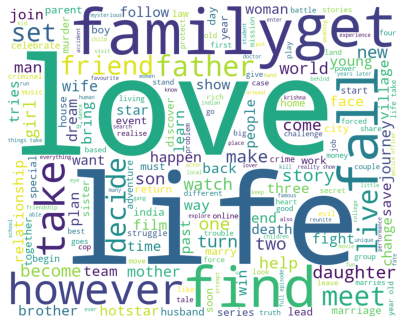


 Genre Cloud (based on frequency)


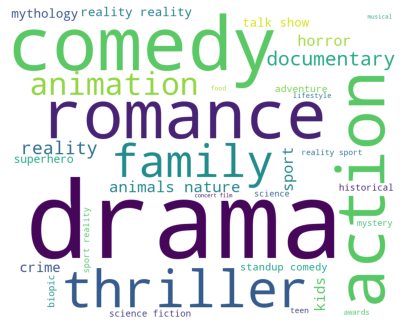

Want to try again y/n --  y
y
----- Select any of the following option ---
1.Find Movies on Basis Movie Name -
2.Find Movies on basis of Genre-
3.Word Clod 
4.Exit 

Enter Your choice from the above options---4


 ------- Exit----------


In [ ]:
# Main function 
if __name__ == "__main__":
  while True:  
    print("----- Select any of the following option ---")
    print("1.Find Movies on Basis Movie Name -\n2.Find Movies on basis of Genre-\n3.Word Cloud \n4.Exit \n")
    try:
          ch=int(input("Enter Your choice from the above options---"))
        #Recommendation on basis of Movie Name
          if(ch==1):
            text=input("Enter the movie name- ")
            Similarity_(text)
            choice=input("Want to try again y/n -- ")
            if(choice=='Y'or choice=='y'):
              continue
            else :
              print("\n\n **------- Exit ----------**")
              break

        #Recommendation on basis of Genre Name  
          elif(ch==2):
            text=input("Enter the Genre name-- ")
            Similarity_(text)
            choice=input("\n Want to try again y/n --")
            if(choice=='Y' or choice=='y'):
              print(choice)
              continue
            else :
              print("\n\n ------- Exit----------")
              break

          elif(ch==3):
              print("\n Description Cloud (based on frequency)\n")
              Word_cloud('description')
              print("\n Genre Cloud (based on frequency)\n")
              Word_cloud('genre')
              choice=input("Want to try again y/n --  ")
              if(choice=='Y' or choice=='y'):
                print(choice)
                continue
              else :
                print("\n ------- Exit----------")
                break
          
          elif(ch==4):
              print("\n\n ------- Exit----------")
              break

        #Wrong Choice
          else:
            print("---Entered Wrong Choice ---")
            choice=input("Want to try again y/n --  ")
            if(choice == 'Y'or choice=='y'):
              print(choice)
              continue
            else :
              print("\n\n ------- Exit----------")
              break
    except:
      print("Some error occured")
      choice=input("Want to try again y/n --  ")
      if(choice == 'Y'or choice=='y'):
          continue
      else :
          print("\n\n ------- Exit----------")
          break

